In [3]:
# Task 3: Unsupervised Learning – Customer Segmentation

# Objective:
# Apply clustering techniques to segment customer data into different groups.

# Tools: Python, Pandas, Scikit-learn, Matplotlib, Seaborn

In [4]:
# --- Import Libraries ---
# [Subtask 1] General setup and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# --- Load Dataset ---
# [Subtask 1] Load a marketing or mall customer dataset
# We'll use the Mall Customers dataset
url = "Mall_Customers.csv"
df = pd.read_csv(url)

In [6]:
# Display first few rows
print("Sample Data:")
print(df.head())

Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


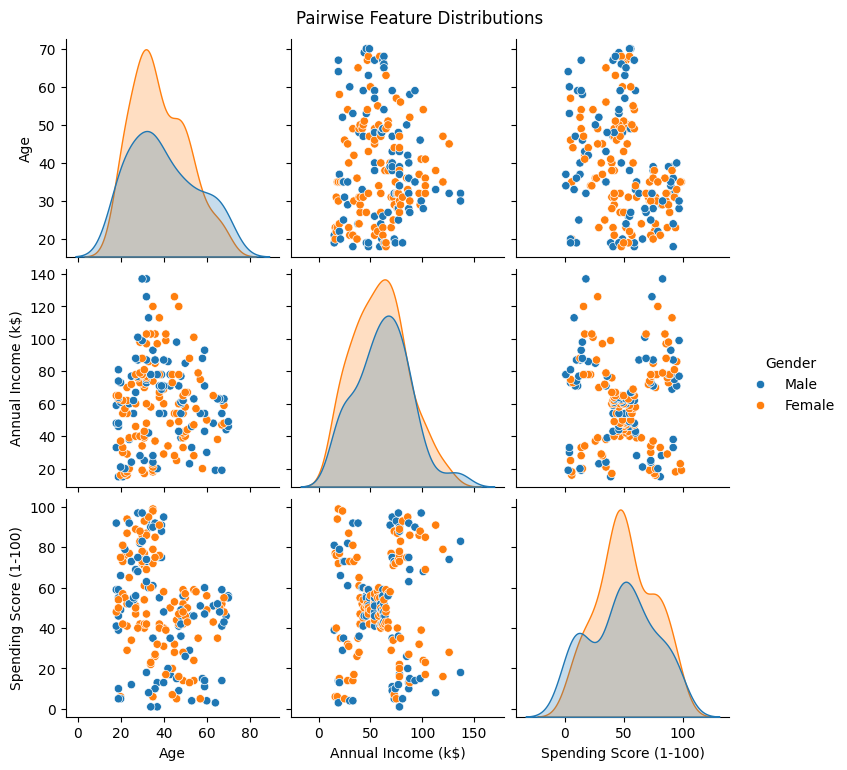

In [7]:
# --- Initial EDA ---
# [Subtask 2] Understand and visualize distributions
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")
plt.suptitle("Pairwise Feature Distributions", y=1.02)
plt.show()

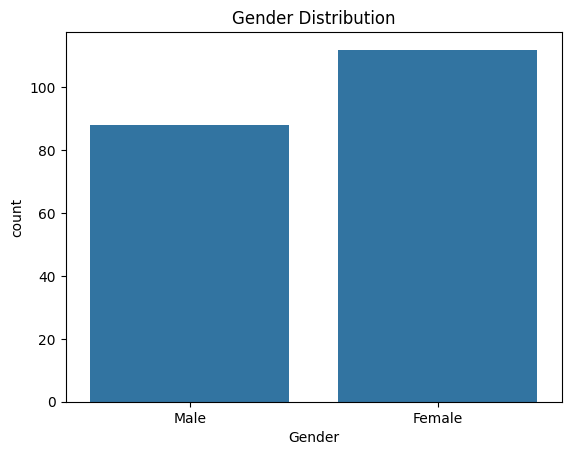

In [8]:
# Gender distribution
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

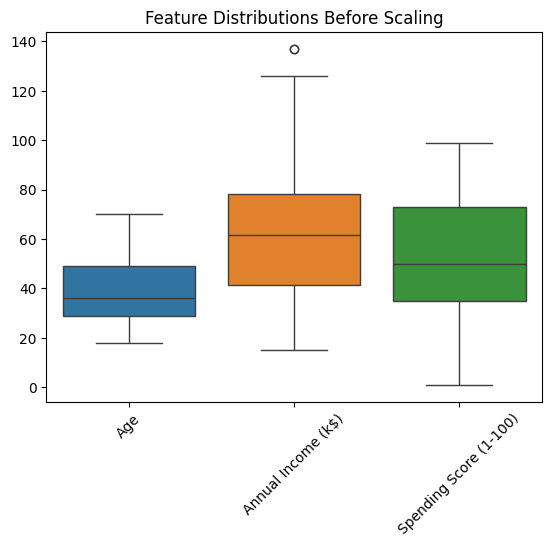

In [9]:
# --- Preprocessing ---
# [Subtask 2] Drop irrelevant columns and scale features
X = df.drop(columns=["CustomerID", "Gender"])

# Visualize features before scaling
sns.boxplot(data=X)
plt.title("Feature Distributions Before Scaling")
plt.xticks(rotation=45)
plt.show()

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# --- Determine Optimal Number of Clusters (Elbow Method) ---
# [Subtask 2] Find the best k for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

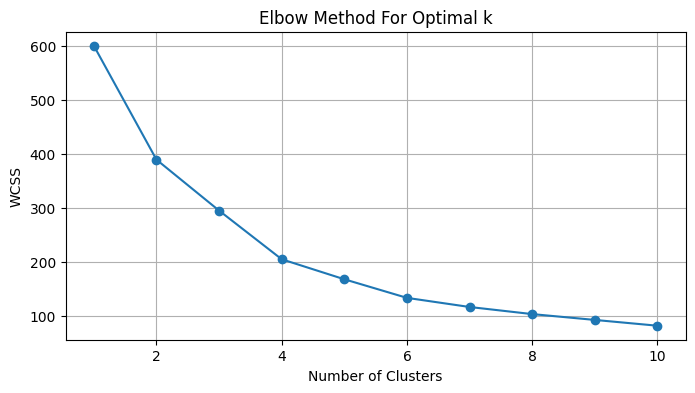

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
# --- Apply KMeans Clustering ---
# [Subtask 2] Choose k=5 based on elbow method and fit KMeans
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

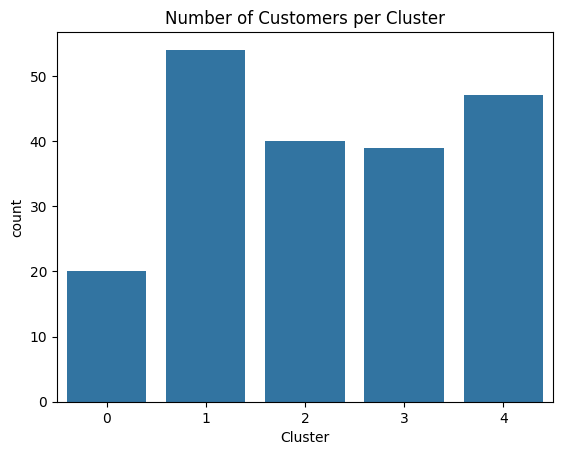

In [14]:
# Add cluster labels to original data
df['Cluster'] = labels

# Visualize cluster count
sns.countplot(x='Cluster', data=df)
plt.title("Number of Customers per Cluster")
plt.show()

In [15]:
# --- Dimensionality Reduction for Visualization ---
# [Subtask 3] Use PCA for 2D plotting of clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

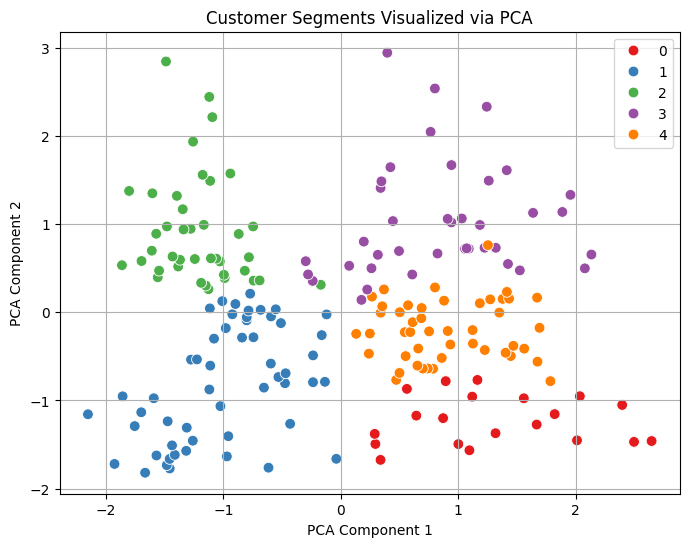

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=60)
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [17]:
# --- Insights (print basic description per cluster) ---
# [Subtask 3] Summarize clusters
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster-wise Customer Averages:")
print(cluster_summary)


Cluster-wise Customer Averages:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [18]:
# --- Detailed Insights Generation ---
# Generate additional insights based on cluster profiles
for cluster_id, values in cluster_summary.iterrows():
    print(f"\nCluster {cluster_id}:")
    age, income, spend = values['Age'], values['Annual Income (k$)'], values['Spending Score (1-100)']
    print(f"- Avg Age: {age:.1f}, Income: {income:.1f}k$, Spending Score: {spend:.1f}")

    if spend > 70:
        spender_type = "Heavy Spenders"
    elif spend > 40:
        spender_type = "Moderate Spenders"
    else:
        spender_type = "Low Spenders"

    if income > 75:
        income_type = "High Income"
    elif income > 40:
        income_type = "Medium Income"
    else:
        income_type = "Low Income"

    if age < 30:
        age_type = "Young"
    elif age < 50:
        age_type = "Mature"
    else:
        age_type = "Older"

    print(f"- Profile: {age_type}, {income_type}, {spender_type}")

    if spender_type == "Heavy Spenders" and income_type in ["Medium Income", "High Income"]:
        print("  → Engage with premium offers, loyalty programs, and personalized marketing.")
    elif spender_type == "Low Spenders" and income_type == "High Income":
        print("  → Opportunity to increase spending via upselling and exclusive product campaigns.")
    elif spender_type == "Low Spenders" and income_type == "Low Income":
        print("  → Focus on affordability, discounts, and value-for-money promotions.")
    elif spender_type == "Moderate Spenders" and income_type == "High Income":
        print("  → May respond well to luxury product placements and personalized offers.")
    else:
        print("  → Generic engagement, test offers and monitor response.")


Cluster 0:
- Avg Age: 46.2, Income: 26.8k$, Spending Score: 18.4
- Profile: Mature, Low Income, Low Spenders
  → Focus on affordability, discounts, and value-for-money promotions.

Cluster 1:
- Avg Age: 25.2, Income: 41.1k$, Spending Score: 62.2
- Profile: Young, Medium Income, Moderate Spenders
  → Generic engagement, test offers and monitor response.

Cluster 2:
- Avg Age: 32.9, Income: 86.1k$, Spending Score: 81.5
- Profile: Mature, High Income, Heavy Spenders
  → Engage with premium offers, loyalty programs, and personalized marketing.

Cluster 3:
- Avg Age: 39.9, Income: 86.1k$, Spending Score: 19.4
- Profile: Mature, High Income, Low Spenders
  → Opportunity to increase spending via upselling and exclusive product campaigns.

Cluster 4:
- Avg Age: 55.6, Income: 54.4k$, Spending Score: 48.9
- Profile: Older, Medium Income, Moderate Spenders
  → Generic engagement, test offers and monitor response.
